<center>Université des Sciences et de la Technologie d'Oran - Mohammed BOUDIAF
<center>Faculté des Mathématiques et Informatique</center>
<center>Département d'Informatique</center>
<center>Module : Imagerie Satellitaire M2 IA</center> 

<center>  <h1>  Fiche TP3 : Traitement </h1></center>

- Baghdad Mohammed Amine
- Hanifi Fatima El-Batoul
- Groupe 02 IAA


<CENTER><H2>  Etape 1 : Rehaussement de contours

### 1- Créeation et appliquation des filtres sur l’image satellitaire.

In [1]:
# importation des librairies
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mplib
import math

##### a.laplacian 
Dans cette partie, nous allons voir comment nous pouvons appliquer un filtre laplacien à l’image. Un filtre laplacien est un détecteur de bord utilisé pour calculer les deuxièmes dérivés d’une image, mesurant la vitesse à laquelle les premiers dérivés changent. Cela détermine si un changement des valeurs de pixels adjacentes provient d’un bord ou d’une progression continue.

[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


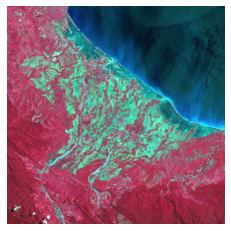

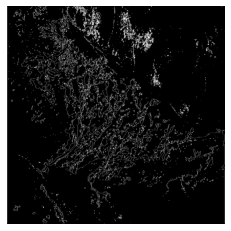

In [2]:
def FiltreLaplacien(InputImage):

    # Construction du masque de Laplacien
    masque_laplacien = np.zeros((3,3))
    masque_laplacien[:]=-1
    masque_laplacien[1,1]=8
    
    
    def init(n,m):
        return np.zeros((n, m))
    
    
    img = mpimg.imread(InputImage)
    n,m,c=img.shape
    
    img_interpo = img_lapla = init(n+2,m+2) 

    # fonction du filtre Laplacien
    
    i=1
    while i < n-1 :
        j=1
        while j < m-1 :
            img_lapla[i][j] = (img[i-1:i+2,j-1:j+2]*masque_laplacien).sum()
            j+=1
        i+=1
    
    img_lapla[img_lapla>=0] = 0
    img_lapla[img_lapla<0] = 1
    
    #Image de polarité
    
    x=img_lapla.shape[0]
    y=img_lapla.shape[1]
    for i in range(0,x-1):
        for j in range(0,y-1):
            if (img_lapla[i][j] == img_lapla[i][j+1]):
                img_interpo[i][j]=0
            else:
                img_interpo[i][j]=1
        
    
    return img_interpo


#laplacian filter matrix
lpf=np.array([[1, 1, 1], [1, 1, 1],[1, 1, 1]]) 
lpf=(-1)*lpf
lpf[1][1]=8
print(lpf)
        


# ouverture du fichier image
ImageFile = 'imsat TP3.jpg'#'split.jpg'#'test.jpg'
imgOG = mpimg.imread(ImageFile)


# affichage de l'image
plt.imshow(imgOG)
plt.axis('off')
plt.show()

 

img=FiltreLaplacien(ImageFile)
plt.axis('off')
plt.imshow(img,cmap='gray')
plt.show()

##### b-Sobel
Le détecteur de bord Sobel est une méthode basée sur le gradient. Il fonctionne avec des dérivés de premier ordre. Il calcule les premiers dérivés de l’image séparément pour les axes X et Y. Les dérivés ne sont que des approximations (car les images ne sont pas continues). Pour les rapprocher, les noyaux suivants sont utilisés pour la convolution :

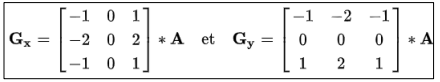

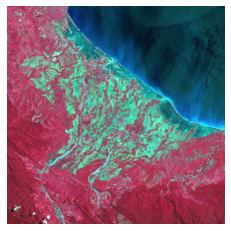

1


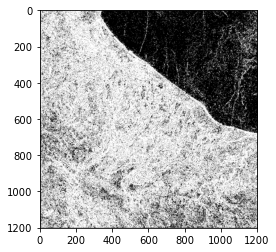

In [3]:
### gradient sobel

def FiltreGradient(img,hx,hy,se):#img input image
    #k nb des lines ou colone symetrique pour chaque filtre moyenne de taille impair
    #hx est un filtre vertical (comme celle de sobel)
    #hy est un filtre horizontal (comme celle de sobel)
    #se seuil
    #ig=0.21*img[:,:,0]+0.71*img[:,:,1]+0.07*img[:,:,2]
    #ig=0.21*img[:,:,0]+0.71*img[:,:,1]+0.07*img[:,:,2]
    
    se=se
    
    #deduction de k (nb des 2 dans la taille du filtre)
    sizex,sizey=img.shape
    vx,vy=hx.shape
    k=int((vx-1)/2)
    print(k)
       
    
    
    #imag final
    ir=np.zeros([sizex, sizey])

    
    #amplitude image
    t=np.zeros([sizex, sizey])
    #direction du gradient image
    d=np.zeros([sizex, sizey])
    
    #gradient x
    gx=np.zeros([sizex, sizey])
    #gradient y
    gy=np.zeros([sizex, sizey])
    
    #gradient total
    g=np.zeros([sizex, sizey])
    
    i=0
    j=0
    
    c=0
    for c in range(3):
        x=0
        while(x<=(sizex-k-1)):##aproche avec effet de contour
            y=k
            
            while(y<=(sizey-k-1)):
                gx[x,y]=0
                gy[x,y]=0
                i=0
                ii=k
                #DEBUT PARCOURS VOISIN

                while(ii>=(-1)*k):##aproche avec effet de contour
                    j=0
                    jj=(-1)*k
                    while(jj<=k):
                        gx[x,y]=gx[x,y]+img[int(x+ii),int(y+jj)]*hx[i,j]
                        gy[x,y]=gy[x,y]+img[int(x+ii),int(y+jj)]*hy[i,j]
                        #print(x,y,ii,jj)
                        jj=jj+1
                        j=j+1
                    ii=ii-1
                    i=i+1
                #FIN PARCOURS VOISIN

                g[x,y]=np.sqrt(gx[x,y]**2+gy[x,y]**2)
            
                #print(s)
                if(g[x,y]>=se):
                    ir[int(x),int(y)]=1
                else:
                    ir[int(x),int(y)]=0
                        
                #print(x,y,s,ir[int(x),int(y)])
                y=y+1
            x=x+1
   
    
    
    mpimg.imsave("test-GRAD-after.jpg",ir);  #if not work use "gray");
    return gx,gy,ir        


#sobel

hx=np.array([[1, 0,-1],
             [2, 0,-2],
             [1, 0,-1]]) 

hy=np.array([[ 1, 2, 1],
             [ 0, 0, 0],
             [-1,-2,-1]]) 
        


# ouverture du fichier image
ImageFile = 'imsat TP3.jpg' #'split.jpg'
img = mpimg.imread(ImageFile)


# affichage de l'image
plt.imshow(img)
plt.axis('off')
plt.show()

    
gx,gy,img=FiltreGradient(img[:,:,0],hx,hy,35)#50 pour split)

plt.imshow(img,cmap='gray')
plt.show()


### 2- Fonctions pour calculer l'amplitude du gradient et la direction du gradient:

Le noyau de gauche se rapproche de la dérivée le long de l’axe X. Celui de droite est pour l’axe Y. À l’aide de ces renseignements, on calculer  calculer  l'amplitude du gradient et la direction du gradient: :

Magnitude or "strength" of the edge:   

Approximate strength: 

The orientation of the edge: 


C:\Users\pasus\AppData\Local\Temp/ipykernel_3268/2701539847.py:3: RuntimeWarning: divide by zero encountered in true_divide
  d=np.arctan(gy/gx)#direction du gradiant
C:\Users\pasus\AppData\Local\Temp/ipykernel_3268/2701539847.py:3: RuntimeWarning: invalid value encountered in true_divide
  d=np.arctan(gy/gx)#direction du gradiant


amplitude


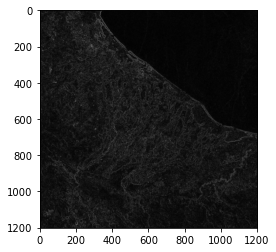

direction


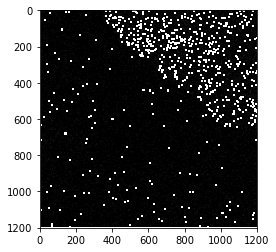

In [4]:
def DirectionETamplitude(gx,gy):
    a=np.sqrt(gx**2+gy**2)#amplitude
    d=np.arctan(gy/gx)#direction du gradiant
    d=d**180/np.pi #conversion vers degre (en int)
    return a,d
                
    
a,d=DirectionETamplitude(gx,gy)
print('amplitude')
plt.imshow(a,cmap='gray')
plt.show()
print('direction')
plt.imshow(d,cmap='gray')
plt.show()